In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv("coins_data.csv")

In [13]:
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum


In [14]:
df.describe()

,Volume,MarketCap
count,2.000000e+01,2.000000e+01
mean,3.989441e+09,4.662433e+10
std,8.674327e+09,1.066258e+11
min,1.823284e+06,3.586504e+09
25%,2.192077e+08,5.583104e+09
50%,5.073004e+08,8.201589e+09
75%,1.928351e+09,2.701560e+10
max,3.314948e+10,4.590837e+11


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       20 non-null     object 
 1   Volume       20 non-null     float64
 2   MarketCap    20 non-null     int64  
 3   TotalSupply  20 non-null     object 
 4   ProofType    20 non-null     object 
 5   Network      20 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In the seventeenth row of the Total Supply column (which is visible in the cell below), there is a decimal point. The presence of this decimal point creates difficulty in converting the string to an integer. Additionally, in all the rows of this column, the comma separator separates the digits of each number, which also creates a similar issue.

In [16]:
df["TotalSupply"]

0             985,239,504
1           1,000,000,000
2                 163,106
3             431,804,080
4           5,347,888,596
5     589,589,040,239,380
6              84,000,000
7          88,996,805,683
8           1,364,182,225
9          10,000,000,000
10            559,509,636
11        141,339,436,384
12         36,244,287,753
13          2,213,836,281
14         99,988,380,689
15         25,540,319,537
16            153,845,639
17         866,300,000.00
18            120,249,203
19             19,508,418
Name: TotalSupply, dtype: object

To remove trailing zeros after the decimal point, strip the commas within the numbers, and convert the entire column to an integer:

In [17]:

df["TotalSupply"] = df["TotalSupply"].str.split(".").str.get(0).str.replace(',', '').astype("Int64")

The new format of the Total Supply column:

In [18]:
df["TotalSupply"]

0           985239504
1          1000000000
2              163106
3           431804080
4          5347888596
5     589589040239380
6            84000000
7         88996805683
8          1364182225
9         10000000000
10          559509636
11       141339436384
12        36244287753
13         2213836281
14        99988380689
15        25540319537
16          153845639
17          866300000
18          120249203
19           19508418
Name: TotalSupply, dtype: Int64

In [19]:
df.describe()

,Volume,MarketCap,TotalSupply
count,2.000000e+01,2.000000e+01,20.0
mean,3.989441e+09,4.662433e+10,29500214799805.699219
std,8.674327e+09,1.066258e+11,131831236396192.734375
min,1.823284e+06,3.586504e+09,163106.0
25%,2.192077e+08,5.583104e+09,362314469.75
50%,5.073004e+08,8.201589e+09,1182091112.5
75%,1.928351e+09,2.701560e+10,28216311591.0
max,3.314948e+10,4.590837e+11,589589040239380.0


In [20]:
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3992451215,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5513660644,5347888596,stablecoin,Ethereum


To convert categorical columns into integers:

In [40]:
label_encoder = LabelEncoder()

df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=["ProofType", "Network"])
# df_encoded["Symbol"] = pd.get_dummies(df_encoded["Symbol"], columns=["Symbol"])
# df_encoded["ProofType"] = label_encoder.fit_transform(df_encoded["ProofType"])
# df_encoded["Network"] = label_encoder.fit_transform(df_encoded["Network"])

In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Symbol                       20 non-null     object 
 1   Volume                       20 non-null     float64
 2   MarketCap                    20 non-null     int64  
 3   TotalSupply                  20 non-null     Int64  
 4   ProofType_PoH                20 non-null     bool   
 5   ProofType_PoS                20 non-null     bool   
 6   ProofType_PoW                20 non-null     bool   
 7   ProofType_RPCA               20 non-null     bool   
 8   ProofType_stablecoin         20 non-null     bool   
 9   Network_Avalanche            20 non-null     bool   
 10  Network_Binance Smart Chain  20 non-null     bool   
 11  Network_Bitcoin              20 non-null     bool   
 12  Network_Cardano              20 non-null     bool   
 13  Network_Dogecoin      

In [42]:
df_encoded.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType_PoH,ProofType_PoS,ProofType_PoW,ProofType_RPCA,ProofType_stablecoin,Network_Avalanche,...,Network_Bitcoin,Network_Cardano,Network_Dogecoin,Network_Ethereum,Network_Litecoin,Network_Polkadot,Network_Polygon,Network_Solana,Network_Tron,Network_XRP Ledger
0,LEO,1.823284e+06,3586504072,985239504,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,UNI,9.918768e+07,3992451215,1000000000,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,WBTC,1.415410e+08,4237575489,163106,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,AVAX,2.197065e+08,4901630273,431804080,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,DAI,2.177113e+08,5513660644,5347888596,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [43]:
df_encoded.columns

Index(['Symbol', 'Volume', 'MarketCap', 'TotalSupply', 'ProofType_PoH',
       'ProofType_PoS', 'ProofType_PoW', 'ProofType_RPCA',
       'ProofType_stablecoin', 'Network_Avalanche',
       'Network_Binance Smart Chain', 'Network_Bitcoin', 'Network_Cardano',
       'Network_Dogecoin', 'Network_Ethereum', 'Network_Litecoin',
       'Network_Polkadot', 'Network_Polygon', 'Network_Solana', 'Network_Tron',
       'Network_XRP Ledger'],
      dtype='object')

To standardizing columns:

In [62]:
from sklearn.preprocessing import StandardScaler

df_to_be_standard = df_encoded[['Volume', 'MarketCap', 'TotalSupply', 'ProofType_PoH',
       'ProofType_PoS', 'ProofType_PoW', 'ProofType_RPCA',
       'ProofType_stablecoin', 'Network_Avalanche',
       'Network_Binance Smart Chain', 'Network_Bitcoin', 'Network_Cardano',
       'Network_Dogecoin', 'Network_Ethereum', 'Network_Litecoin',
       'Network_Polkadot', 'Network_Polygon', 'Network_Solana', 'Network_Tron',
       'Network_XRP Ledger']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_be_standard)
scaled_df = pd.DataFrame(scaled_data, columns=df_to_be_standard.columns)
# scaled_df["Symbol"] = df_encoded["Symbol"]

In [49]:
scaled_df.head()

,Volume,MarketCap,TotalSupply,ProofType_PoH,ProofType_PoS,ProofType_PoW,ProofType_RPCA,ProofType_stablecoin,Network_Avalanche,Network_Binance Smart Chain,Network_Bitcoin,Network_Cardano,Network_Dogecoin,Network_Ethereum,Network_Litecoin,Network_Polkadot,Network_Polygon,Network_Solana,Network_Tron,Network_XRP Ledger
0,-0.471646,-0.414120,-0.229578,-0.229416,1.105542,-0.577350,-0.229416,-0.5,-0.229416,-0.333333,-0.229416,-0.229416,-0.229416,1.224745,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416
1,-0.460130,-0.410214,-0.229578,-0.229416,1.105542,-0.577350,-0.229416,-0.5,-0.229416,-0.333333,-0.229416,-0.229416,-0.229416,1.224745,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416
2,-0.455120,-0.407855,-0.229586,-0.229416,-0.904534,1.732051,-0.229416,-0.5,-0.229416,-0.333333,-0.229416,-0.229416,-0.229416,1.224745,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416
3,-0.445875,-0.401465,-0.229582,-0.229416,1.105542,-0.577350,-0.229416,-0.5,4.358899,-0.333333,-0.229416,-0.229416,-0.229416,-0.816497,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416
4,-0.446111,-0.395576,-0.229544,-0.229416,-0.904534,-0.577350,-0.229416,2.0,-0.229416,-0.333333,-0.229416,-0.229416,-0.229416,1.224745,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416,-0.229416


Drawing Dendrograms:

This is a diagram that is formed by considering all the columns:

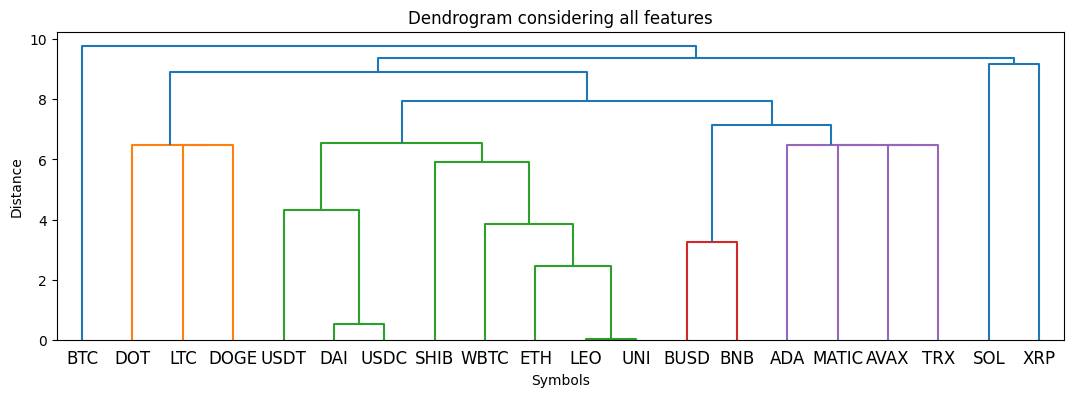

In [50]:
linkage_matrix0 = linkage(scaled_df, method='ward')

plt.figure(figsize=(13, 4))
dendrogram(linkage_matrix0, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram considering all features')
plt.show()


In [51]:
df["Symbol"]

0       LEO
1       UNI
2      WBTC
3      AVAX
4       DAI
5      SHIB
6       LTC
7       TRX
8       DOT
9     MATIC
10      SOL
11     DOGE
12      ADA
13     BUSD
14      XRP
15     USDC
16      BNB
17     USDT
18      ETH
19      BTC
Name: Symbol, dtype: object

# Part 1

A diagram formed by considering only two columns, MarketCap and Volume:

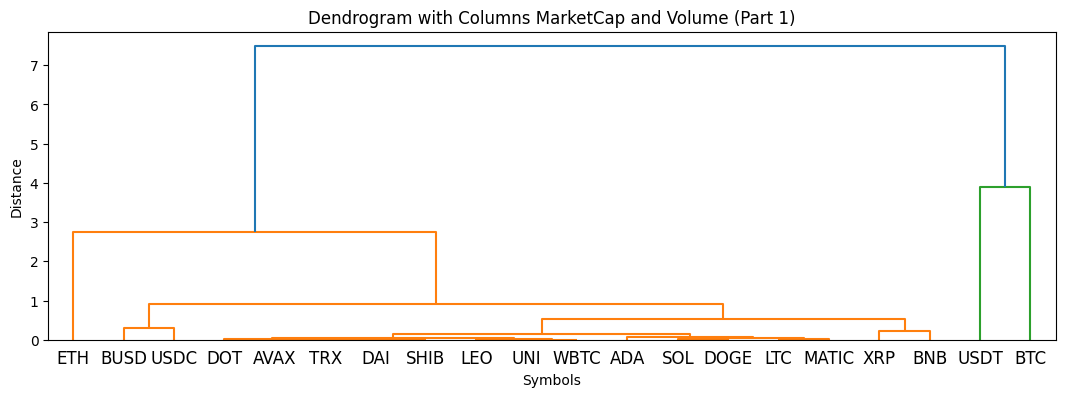

In [52]:
df_part1 = scaled_df[["MarketCap", "Volume"]]

linkage_matrix1 = linkage(df_part1, method='ward') 

plt.figure(figsize=(13, 4))
dendrogram(linkage_matrix1, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram with Columns MarketCap and Volume (Part 1)')
plt.show()


In [53]:
from scipy.cluster.hierarchy import fcluster

threshold = 5
cluster_labels = fcluster(linkage_matrix1, threshold, criterion='distance')
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2],
      dtype=int32)

# Part 2

To draw a diagram considering the columns MarketCap, Volume, and ProofType, all the columns derived from this column after applying the get_dummies function should be involved in drawing the chart:

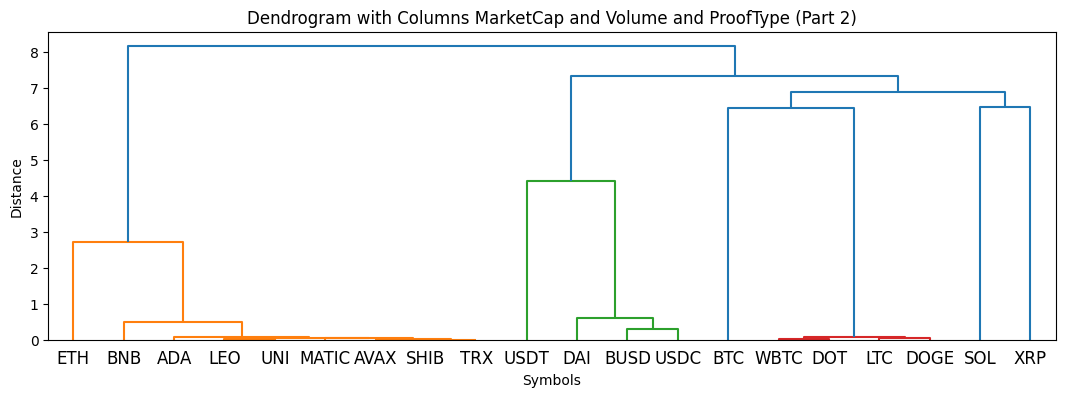

In [54]:
df_part2 = scaled_df[["MarketCap", "Volume", "ProofType_PoH",
       "ProofType_PoS", "ProofType_PoW", "ProofType_RPCA",
       "ProofType_stablecoin"]]

plt.figure(figsize=(13, 4))
linkage_matrix2 = linkage(df_part2, method='ward') 
dendrogram(linkage_matrix2, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram with Columns MarketCap and Volume and ProofType (Part 2)')
plt.show()


In [55]:
from scipy.cluster.hierarchy import fcluster

threshold = 7.7
cluster_labels = fcluster(linkage_matrix2, threshold, criterion='distance')
cluster_labels

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2],
      dtype=int32)

# Part 3

In [56]:
scaled_df.columns

Index(['Volume', 'MarketCap', 'TotalSupply', 'ProofType_PoH', 'ProofType_PoS',
       'ProofType_PoW', 'ProofType_RPCA', 'ProofType_stablecoin',
       'Network_Avalanche', 'Network_Binance Smart Chain', 'Network_Bitcoin',
       'Network_Cardano', 'Network_Dogecoin', 'Network_Ethereum',
       'Network_Litecoin', 'Network_Polkadot', 'Network_Polygon',
       'Network_Solana', 'Network_Tron', 'Network_XRP Ledger'],
      dtype='object')

This time, in addition to the columns from the previous stage, two columns, Network and TotalSupply, have been included in the calculations. Regarding the Network column, just like in the previous stage, all the columns derived from it are used for drawing the chart.

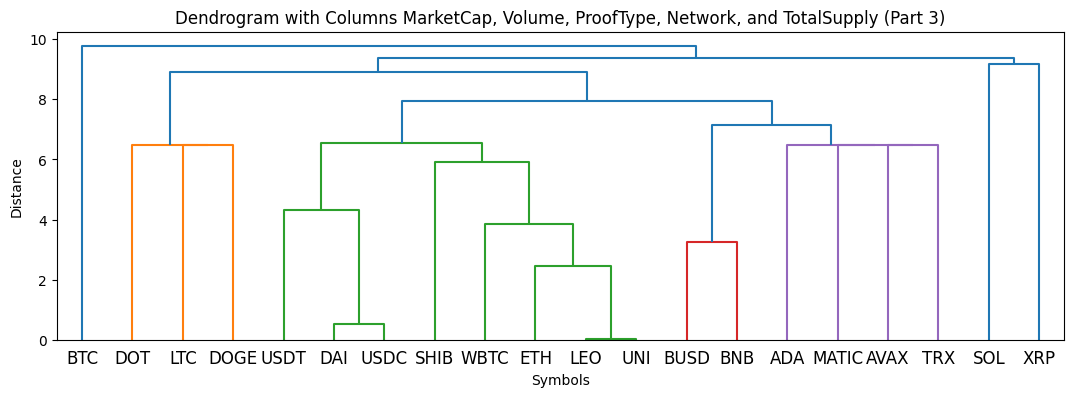

In [58]:
df_part3 = scaled_df[['Volume', 'MarketCap', 'TotalSupply', 'ProofType_PoH', 'ProofType_PoS',
       'ProofType_PoW', 'ProofType_RPCA', 'ProofType_stablecoin',
       'Network_Avalanche', 'Network_Binance Smart Chain', 'Network_Bitcoin',
       'Network_Cardano', 'Network_Dogecoin', 'Network_Ethereum',
       'Network_Litecoin', 'Network_Polkadot', 'Network_Polygon',
       'Network_Solana', 'Network_Tron', 'Network_XRP Ledger']]

plt.figure(figsize=(13, 4))
linkage_matrix3 = linkage(df_part3, method='ward') 
dendrogram(linkage_matrix3, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram with Columns MarketCap, Volume, ProofType, Network, and TotalSupply (Part 3)')
plt.show()


In [61]:
threshold = 9.6
cluster_labels = fcluster(linkage_matrix3, threshold, criterion='distance')
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int32)